In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

## Original Data (NO RATIOS)

In [3]:
data = pd.read_csv(Path("../Resources/relabeled_data.csv"))

In [4]:
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0


In [5]:
#data.rename(columns={'Unnamed: 0':'delete'}, inplace=True)
#data.drop(columns={"delete"},inplace=True)

## Understand and Analyze Data

In [6]:
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,0
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,0
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,0
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0
78678,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0
78679,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0
78680,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0


In [7]:
data.shape

(78682, 19)

In [8]:
data = pd.DataFrame(data)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   current_assets                 78682 non-null  float64
 1   cost_of_goods_sold             78682 non-null  float64
 2   depreciation_and_amortization  78682 non-null  float64
 3   EBITDA                         78682 non-null  float64
 4   inventory                      78682 non-null  float64
 5   net_income                     78682 non-null  float64
 6   total_receivables              78682 non-null  float64
 7   market_value                   78682 non-null  float64
 8   net_sales                      78682 non-null  float64
 9   total_assets                   78682 non-null  float64
 10  total_long_term_debt           78682 non-null  float64
 11  EBIT                           78682 non-null  float64
 12  gross_profit                   78682 non-null 

In [10]:
data.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,EBIT,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operationg_expenses,status
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307,0.066343
std,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038,0.248882
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000,0.000000
25%,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500,0.000000
50%,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000,0.000000
75%,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250,0.000000
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000,1.000000


## Split data and prepare for training

In [11]:
# Import module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create X, or features DataFrame
X = data[['current_assets', 'total_current_liabilities']]

# Create y, or target DataFrame
y = data['status']

# Use train_test_split to separate the data
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.25)

### Train the model on 1 stump tree

In [12]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer with 1 stump trees
Ada_classifier = AdaBoostClassifier(n_estimators=1)

In [13]:
# Train Adaboost Classifer
AdaBoost = Ada_classifier.fit(X_train, y_train)

In [14]:
#Predict the response for test dataset
AdaBoost_pred = AdaBoost.predict(X_test)

In [15]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy of the model is:  ", accuracy_score(y_test, AdaBoost_pred))

The accuracy of the model is:   0.9332011590666464


### Train the model on 20 stump trees

In [16]:
# Create adaboost classifer with 20 stump trees
Ada_classifier20 = AdaBoostClassifier(n_estimators=20)

# Train Adaboost Classifer
AdaBoost20 = Ada_classifier.fit(X_train, y_train)

#Predict the response for test dataset
AdaBoost_pred20 = AdaBoost.predict(X_test)

In [17]:
# Model accuracy 20 trees
# printing
print("The accuracy of the model with 20 Stump Trees is:  ", accuracy_score(y_test, AdaBoost_pred20))

The accuracy of the model with 20 Stump Trees is:   0.9332011590666464


In [18]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=AdaBoostClassifier()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid.fit(X_train,y_train)

# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

The best estimator returned by GridSearch CV is: AdaBoostClassifier(n_estimators=1)


### Train Model on X number of stump trees

In [19]:
# Create adaboost classifer with 5 stump trees
Ada_classifier4 = AdaBoostClassifier(n_estimators=4)

# Train Adaboost Classifer
AdaBoost4 = Ada_classifier4.fit(X_train, y_train)

#Predict the response for test dataset
AdaBoost_pred4 = AdaBoost4.predict(X_test)

# printing
print("The accuracy of the model is:  ", accuracy_score(y_test, AdaBoost_pred4))

The accuracy of the model is:   0.9332011590666464


## ADABOOST Regression

In [20]:
# importing module
from sklearn.ensemble import AdaBoostRegressor

# Create adaboost regressor with default parameters
Ada_regressor = AdaBoostRegressor()

# Train Adaboost Classifer
AdaBoost_R = Ada_regressor.fit(X_train, y_train)

In [21]:
# Grade the prediction
AdaBoostR_pred = AdaBoost_R.predict(X_test)
AdaBoostR_pred 

array([0.06181591, 0.07918159, 0.06181591, ..., 0.07918159, 0.07918159,
       0.07918159])

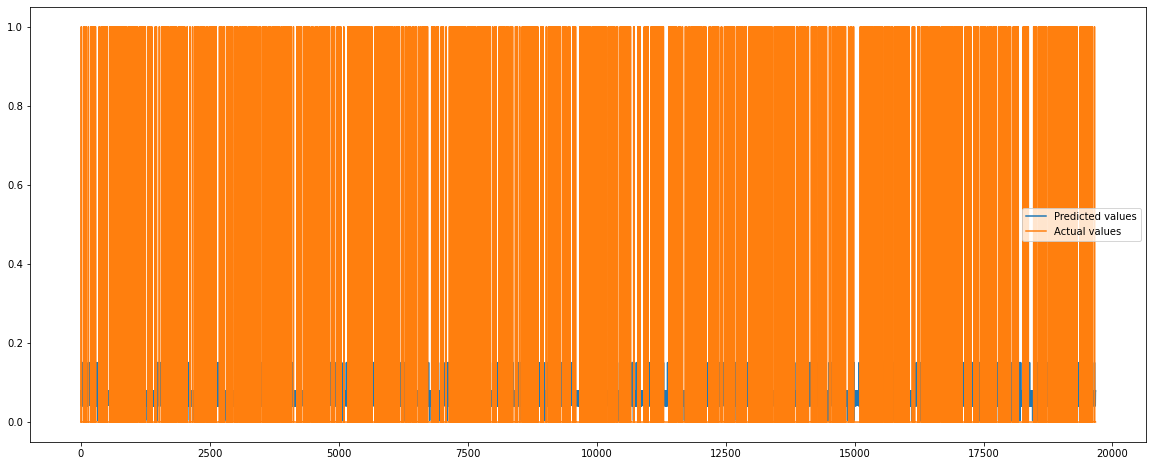

In [22]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoostR_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

In [23]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_test, AdaBoostR_pred))

R-square score is : 0.003937136830681753


### Find the optimum mumber of stump trees

In [24]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=AdaBoostRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid.fit(X_train,y_train)

# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

The best estimator returned by GridSearch CV is: AdaBoostRegressor(n_estimators=39)


## Train model with optimum number of stump trees

In [25]:
# Create adaboost regressor with default parameters
Ada_regressor40 = AdaBoostRegressor(n_estimators=40)

# Train Adaboost Classifer
AdaBoost_R40 = Ada_regressor40.fit(X_train, y_train)

#Predict 
AdaBoostR_pred40 = AdaBoost_R40.predict(X_test)

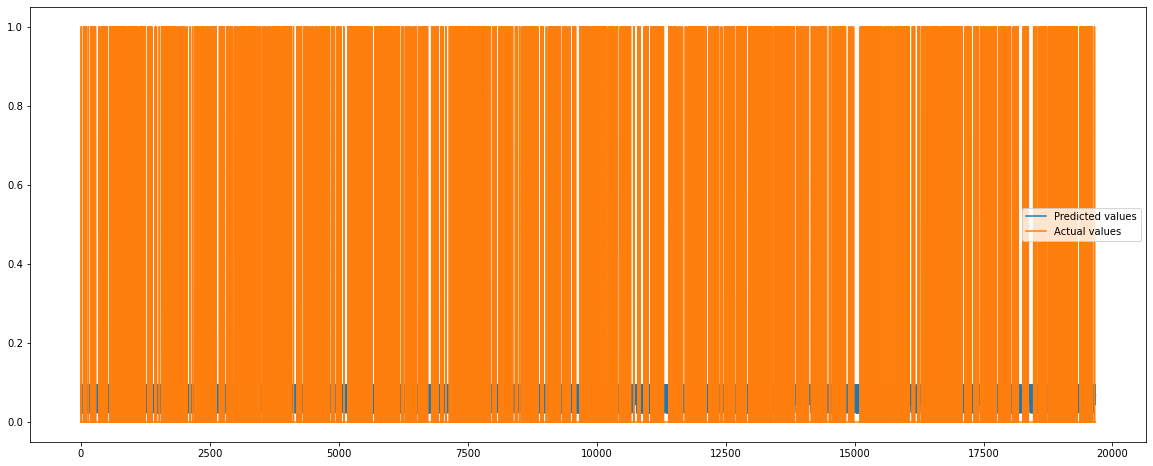

In [26]:
# Visualize the tested model
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoostR_pred40, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

In [27]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_test, AdaBoostR_pred40))

R-square score is : 0.0006123009084959552


### R-square comparison

In [28]:
print('R-square score is :', r2_score(y_test, AdaBoostR_pred))

R-square score is : 0.003937136830681753


In [29]:
print('R-square score is :', r2_score(y_test, AdaBoostR_pred40))

R-square score is : 0.0006123009084959552


# Interpretation
If the squared error is very small then we can say that the line is a good fit. So if SEline is a small number then the whole fraction will be a very small value. And this will result in a larger number when subtracted from one. Thus if the squared error is small then R squared or the coefficient of determination will get larger, nearly equal to one. This shows that the line is a good fit.
Similarly in the opposite case if the squared error of line is huge that means a lot of error between data points and the line, then SEline this number will get large and hence resulting in a larger value of the fraction. So the R squared or the coefficient of determination will be a smaller value, showing a poorly fit regression line.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

#X, y = data(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=40)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


X = data[['current_assets', 'total_current_liabilities']]

# Create y, or target DataFrame
y = data['status']

In [32]:
# Import the module
from imblearn.metrics import classification_report_imbalanced

AdaBoostR_pred = np.where(AdaBoostR_pred < 0.5, 0, 1)
#print  the classification report
classification_report = classification_report_imbalanced(y_test,AdaBoostR_pred)
print(classification_report)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      1.00      0.00      0.97      0.00      0.00     18357
          1       0.00      0.00      1.00      0.00      0.00      0.00      1314

avg / total       0.87      0.93      0.07      0.90      0.00      0.00     19671



In [33]:
# Import the module
from imblearn.metrics import classification_report_imbalanced
AdaBoostR_pred40 = np.where(AdaBoostR_pred40 < 0.5, 0, 1)
# Print the classification report
classification_report40 = classification_report_imbalanced(y_test,AdaBoostR_pred40)
print(classification_report)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      1.00      0.00      0.97      0.00      0.00     18357
          1       0.00      0.00      1.00      0.00      0.00      0.00      1314

avg / total       0.87      0.93      0.07      0.90      0.00      0.00     19671

